<a href="https://colab.research.google.com/github/keshavprof123/Differentiated-Thyroid-Cancer-Recurrence/blob/main/Differentiated_Thyroid_Cancer_Recurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915)

# data (as pandas dataframes)
X = differentiated_thyroid_cancer_recurrence.data.features
y = differentiated_thyroid_cancer_recurrence.data.targets

# metadata
print(differentiated_thyroid_cancer_recurrence.metadata)

# variable information
print(differentiated_thyroid_cancer_recurrence.variables)


{'uci_id': 915, 'name': 'Differentiated Thyroid Cancer Recurrence', 'repository_url': 'https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence', 'data_url': 'https://archive.ics.uci.edu/static/public/915/data.csv', 'abstract': 'This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 383, 'num_features': 16, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['Recurred'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2023, 'last_updated': 'Wed Mar 20 2024', 'dataset_doi': '10.24432/C5632J', 'creators': ['Shiva Borzooei', 'Aidin Tarokhian'], 'intro_paper': {'ID': 333, 'type': 'NA

In [3]:
thyroid_data = X.head(15)
print(thyroid_data)

    Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0    27      F      No         No              No                 Euthyroid   
1    34      F      No        Yes              No                 Euthyroid   
2    30      F      No         No              No                 Euthyroid   
3    62      F      No         No              No                 Euthyroid   
4    62      F      No         No              No                 Euthyroid   
5    52      M     Yes         No              No                 Euthyroid   
6    41      F      No        Yes              No  Clinical Hyperthyroidism   
7    46      F      No         No              No                 Euthyroid   
8    51      F      No         No              No                 Euthyroid   
9    40      F      No         No              No                 Euthyroid   
10   75      F      No         No              No                 Euthyroid   
11   59      F      No         No              No   

In [4]:
thyroid_data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


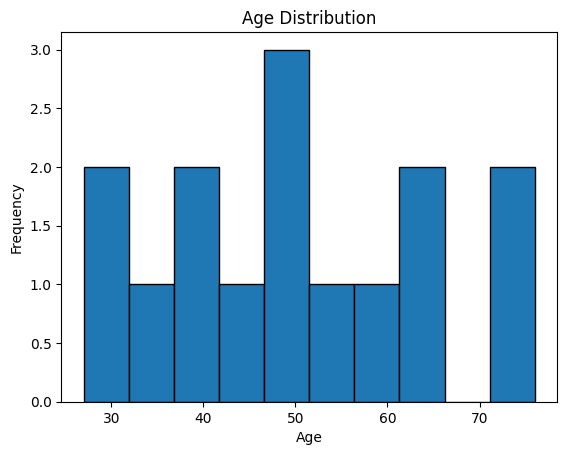

In [5]:
import matplotlib.pyplot as plt
plt.hist(thyroid_data['Age'], edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Select only numerical columns
numerical_columns = thyroid_data.select_dtypes(include=['number']).columns
thyroid_data_numerical = thyroid_data[numerical_columns]

# Fit the scaler to the numerical features and transform them
X_scaled = scaler.fit_transform(thyroid_data_numerical)

# The variable X_scaled now contains the standardized numerical features
print(X_scaled)

[[-1.62980938]
 [-1.13946559]
 [-1.41966204]
 [ 0.8219096 ]
 [ 0.8219096 ]
 [ 0.12141846]
 [-0.64912179]
 [-0.29887622]
 [ 0.05136935]
 [-0.7191709 ]
 [ 1.73254808]
 [ 0.61176226]
 [-0.08872888]
 [-0.01867976]
 [ 1.8025972 ]]


In [9]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'thyroid_data' is your DataFrame
# Select categorical columns
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns) # Print categorical columns to inspect

# Initialize OneHotEncoder
# Removed the 'sparse=False' argument as it's no longer supported
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical features
encoded_data = encoder.fit_transform(thyroid_data[categorical_columns])
print("Shape of encoded_data:", encoded_data.shape) # Print shape of encoded_data to inspect

# Get the feature names after encoding
feature_names = encoder.get_feature_names_out(categorical_columns)
print("Generated Feature Names:", feature_names) # Print feature names to inspect

# Create a DataFrame from the encoded data
# The output of fit_transform is dense by default now.
# Convert the sparse matrix to a dense array before creating the DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenate the encoded features with the numerical features
# Make sure the original thyroid_data DataFrame is used for dropping columns
thyroid_data_encoded = pd.concat([thyroid_data.drop(columns=categorical_columns), encoded_df], axis=1)

print(thyroid_data_encoded)

Categorical Columns: Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'],
      dtype='object')
Shape of encoded_data: (15, 24)
Generated Feature Names: ['Gender_F' 'Gender_M' 'Smoking_No' 'Smoking_Yes' 'Hx Smoking_No'
 'Hx Smoking_Yes' 'Hx Radiothreapy_No'
 'Thyroid Function_Clinical Hyperthyroidism'
 'Thyroid Function_Clinical Hypothyroidism' 'Thyroid Function_Euthyroid'
 'Physical Examination_Multinodular goiter'
 'Physical Examination_Single nodular goiter-left'
 'Physical Examination_Single nodular goiter-right' 'Adenopathy_No'
 'Pathology_Micropapillary' 'Focality_Multi-Focal' 'Focality_Uni-Focal'
 'Risk_Low' 'T_T1a' 'N_N0' 'M_M0' 'Stage_I' 'Response_Excellent'
 'Response_Indeterminate']
    Age  Gender_F  Gender_M  Smoking_No  Smoking_Yes  Hx Smoking_No  \
0    27       1.0       0.0         1.0          0.0            1.0   
1    

In [10]:
from sklearn.model_selection import train_test_split

# Assuming 'thyroid_data_encoded' is your preprocessed DataFrame and
# you need to extract the corresponding target values from the original 'y'
# based on the indices used to create 'thyroid_data'

# Assuming you created 'thyroid_data' using something like:
# thyroid_data = X.head(15)

# Extract the corresponding target values
y_subset = y.iloc[:15]  # Adjust the slicing based on how 'thyroid_data' was created

X_train, X_test, y_train, y_test = train_test_split(
    thyroid_data_encoded, y_subset, test_size=0.2, random_state=42
)  # Adjust test_size and random_state as needed

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (12, 25) (12, 1)
Testing set shape: (3, 25) (3, 1)


In [11]:
# Convert 'yes'/'no' to 1/0 in your target variable 'y_subset' before splitting
y_subset = y_subset.replace({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(
    thyroid_data_encoded, y_subset, test_size=0.2, random_state=42
)

# ... (rest of your code)

<ipython-input-11-3553768300>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_subset = y_subset.replace({'Yes': 1, 'No': 0})


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# Evaluate Models
def evaluate_model(predictions, model_name):
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

evaluate_model(linear_predictions, "Linear Regression")
evaluate_model(tree_predictions, "Decision Tree")
evaluate_model(forest_predictions, "Random Forest")

Linear Regression - Mean Squared Error: 0.0, R-squared: 1.0
Decision Tree - Mean Squared Error: 0.0, R-squared: 1.0
Random Forest - Mean Squared Error: 0.0, R-squared: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


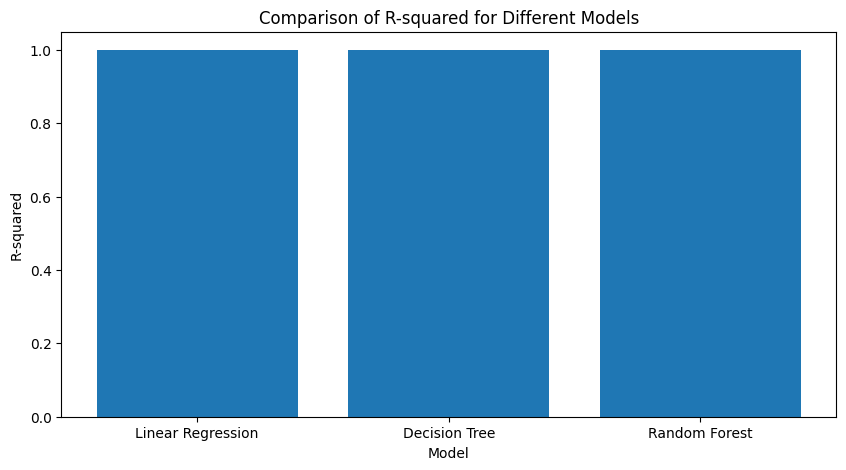

In [13]:
# comparing regression models

import matplotlib.pyplot as plt
import numpy as np

def compare_models(linear_predictions, tree_predictions, forest_predictions):
  models = ["Linear Regression", "Decision Tree", "Random Forest"]
  predictions = [linear_predictions, tree_predictions, forest_predictions]
  mse_scores = []
  r2_scores = []

  for pred in predictions:
    mse_scores.append(mean_squared_error(y_test, pred))
    r2_scores.append(r2_score(y_test, pred))

  # Plotting R-squared scores
  plt.figure(figsize=(10, 5))
  plt.bar(models, r2_scores)
  plt.xlabel("Model")
  plt.ylabel("R-squared")
  plt.title("Comparison of R-squared for Different Models")
  plt.show()

compare_models(linear_predictions, tree_predictions, forest_predictions)


In [14]:
# Check the unique values and their counts in y_train
print(y_train['Recurred'].value_counts())

# If y_train only contains one class, adjust how you create the subset
# in the earlier steps to ensure both classes are present in the training set.

#ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

Recurred
0    12
Name: count, dtype: int64


In [15]:
# Before splitting the data, check the distribution of your target variable
print(y_subset.value_counts())

# Adjust the 'stratify' parameter in train_test_split
# to ensure both classes are present in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    thyroid_data_encoded, y_subset, test_size=0.2, random_state=42, stratify=y_subset
)

# After splitting, verify that both classes are present in the training set
print(y_train.value_counts())

# ... (rest of your code)

Recurred
0           15
Name: count, dtype: int64
Recurred
0           12
Name: count, dtype: int64


In [16]:
print(y_train.value_counts())
print(y_test.value_counts())

Recurred
0           12
Name: count, dtype: int64
Recurred
0           3
Name: count, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is your DataFrame with categorical features
# Identify columns with non-numerical data
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply label encoding to convert categorical features to numerical
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le  # Store

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Initialize OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for a dense array

encoded_categorical_data = encoder.fit_transform(X[categorical_cols])

feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=feature_names, index=X.index)

X_processed = pd.concat([X[numerical_cols], encoded_categorical_df], axis=1)


y = y.replace({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (306, 55) (306, 1)
Testing set shape: (77, 55) (77, 1)


<ipython-input-24-1933614264>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Yes': 1, 'No': 0})


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Check class distribution
print(y_train.value_counts())
print(y_test.value_counts())

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Models
def evaluate_classifier(predictions, model_name):
  accuracy = accuracy_score(y_test, predictions)
  report = classification_report(y_test, predictions)
  print(f"{model_name} - Accuracy: {accuracy}")
  print(f"Classification Report:\n{report}")

evaluate_classifier(logistic_predictions, "Logistic Regression")
evaluate_classifier(svm_predictions, "SVM")
evaluate_classifier(nn_predictions, "Neural Network")
evaluate_classifier(rf_predictions, "Random Forest")


Recurred
0           220
1            86
Name: count, dtype: int64
Recurred
0           55
1           22
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Logistic Regression - Accuracy: 0.974025974025974
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.91      0.95        22

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.97        77
weighted avg       0.97      0.97      0.97        77

SVM - Accuracy: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        55
           1       0.75      0.27      0.40        22

    accuracy                           0.77        77
   macro avg       0.76      0.62      0.63        77
weighted avg       0.76      0.77      0.72        77

Neural Network - Accuracy: 0.974025974025974
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.91     

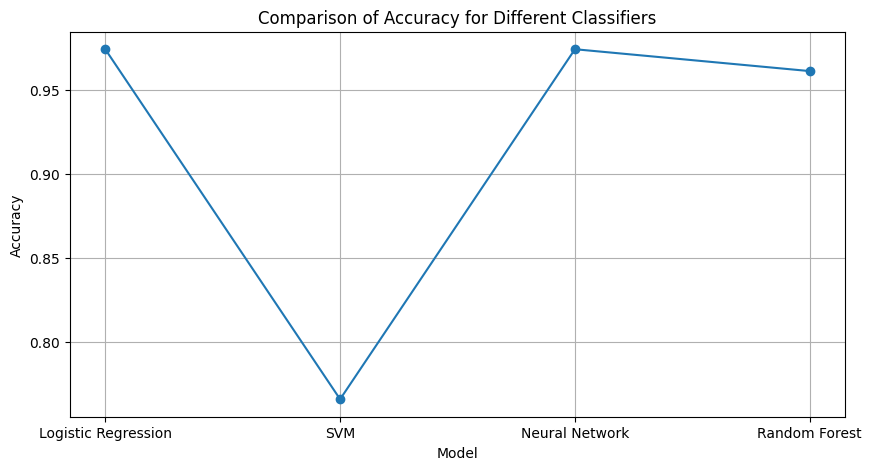

In [26]:
def compare_classifiers(logistic_predictions, svm_predictions, nn_predictions, rf_predictions):
  models = ["Logistic Regression", "SVM", "Neural Network", "Random Forest"]
  predictions = [logistic_predictions, svm_predictions, nn_predictions, rf_predictions]
  accuracy_scores = []

  for pred in predictions:
    accuracy_scores.append(accuracy_score(y_test, pred))

  plt.figure(figsize=(10, 5))
  plt.plot(models, accuracy_scores, marker='o')
  plt.xlabel("Model")
  plt.ylabel("Accuracy")
  plt.title("Comparison of Accuracy for Different Classifiers")
  plt.grid(True)
  plt.show()

compare_classifiers(logistic_predictions, svm_predictions, nn_predictions, rf_predictions)


In [27]:
print(X_test)
print(y_test)


     Age  Gender_F  Gender_M  Smoking_No  Smoking_Yes  Hx Smoking_No  \
157   24       0.0       1.0         1.0          0.0            1.0   
140   28       1.0       0.0         1.0          0.0            1.0   
312   27       0.0       1.0         1.0          0.0            1.0   
180   72       1.0       0.0         1.0          0.0            1.0   
13    50       1.0       0.0         1.0          0.0            1.0   
..   ...       ...       ...         ...          ...            ...   
373   31       0.0       1.0         0.0          1.0            1.0   
254   31       0.0       1.0         0.0          1.0            0.0   
353   73       1.0       0.0         1.0          0.0            1.0   
14    76       1.0       0.0         1.0          0.0            1.0   
306   36       1.0       0.0         1.0          0.0            1.0   

     Hx Smoking_Yes  Hx Radiothreapy_No  Hx Radiothreapy_Yes  \
157             0.0                 1.0                  0.0   
140    

In [28]:
nn_predictions = nn_model.predict(X_test)

# Extract the values from the DataFrame's 'Recurred' column as a 1D array
y_test_values = y_test['Recurred'].values

# Ensure nn_predictions is also 1-dimensional if necessary
nn_predictions = nn_predictions.ravel()

# Create a DataFrame to display predictions alongside actual values
results_df = pd.DataFrame({'Actual Recurrence': y_test_values, 'Predicted Recurrence': nn_predictions})
print(results_df)

    Actual Recurrence  Predicted Recurrence
0                   0                     0
1                   0                     0
2                   1                     1
3                   0                     0
4                   0                     0
..                ...                   ...
72                  1                     1
73                  0                     0
74                  1                     1
75                  0                     0
76                  1                     0

[77 rows x 2 columns]


In [29]:
## NN pred %age
correct_predictions = (results_df['Actual Recurrence'] == results_df['Predicted Recurrence']).sum()
total_predictions = len(results_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Percentage of Correct Predictions: {accuracy_percentage:.2f}%")


Percentage of Correct Predictions: 97.40%


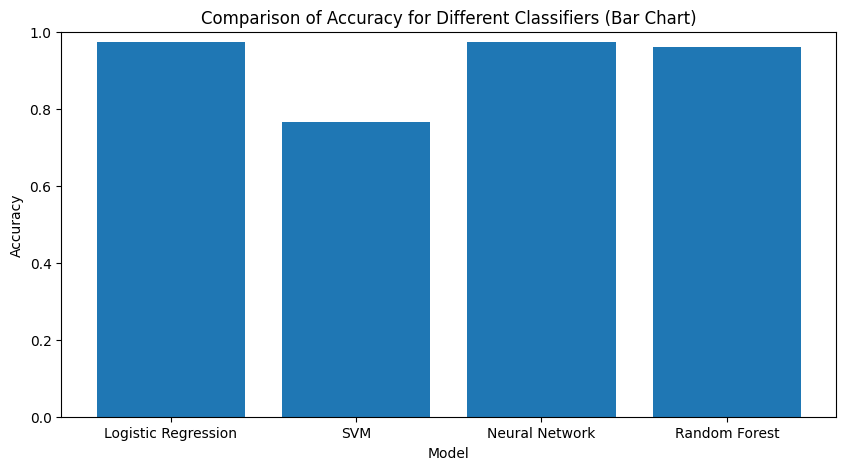

In [30]:
def plot_classifier_accuracy_bar(logistic_predictions, svm_predictions, nn_predictions, rf_predictions):
  models = ["Logistic Regression", "SVM", "Neural Network", "Random Forest"]
  predictions = [logistic_predictions, svm_predictions, nn_predictions, rf_predictions]
  accuracy_scores = []

  for pred in predictions:
    accuracy_scores.append(accuracy_score(y_test, pred))

  plt.figure(figsize=(10, 5))
  plt.bar(models, accuracy_scores)
  plt.xlabel("Model")
  plt.ylabel("Accuracy")
  plt.title("Comparison of Accuracy for Different Classifiers (Bar Chart)")
  plt.ylim(0, 1) # Ensure y-axis starts at 0 and ends at 1 (for accuracy)
  plt.show()

plot_classifier_accuracy_bar(logistic_predictions, svm_predictions, nn_predictions, rf_predictions)

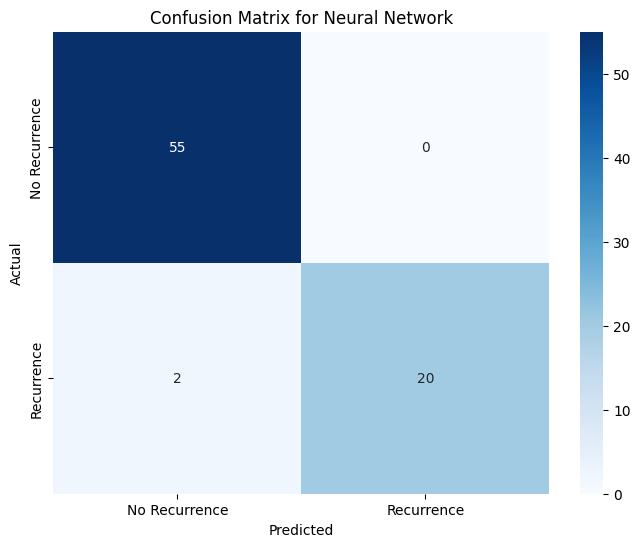

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix for {model_name}')
  plt.show()

plot_confusion_matrix(y_test_values, nn_predictions, "Neural Network")

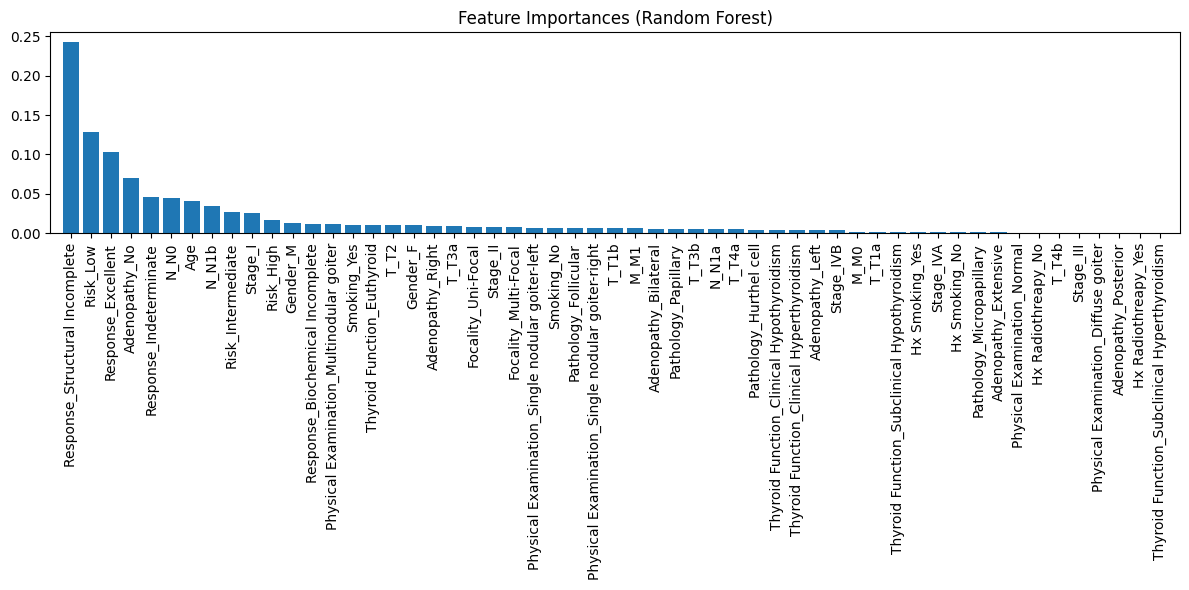

In [32]:
# Feature Importance

if hasattr(rf_classifier, 'feature_importances_'):
    importances = rf_classifier.feature_importances_
    # Assuming X_train is a pandas DataFrame or has a .columns attribute
    feature_names = X_train.columns
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances (Random Forest)")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
else:
    print("Random Forest Classifier does not have feature_importances_ attribute.")

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression # Import LinearRegression here too

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for a dense array

encoded_categorical_data = encoder.fit_transform(X[categorical_cols])

feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=feature_names, index=X.index)

X_processed = pd.concat([X[numerical_cols], encoded_categorical_df], axis=1)


y = y.replace({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y # Use stratify for classification target
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

Training set shape: (306, 55) (306, 1)
Testing set shape: (77, 55) (77, 1)


LinearRegression()

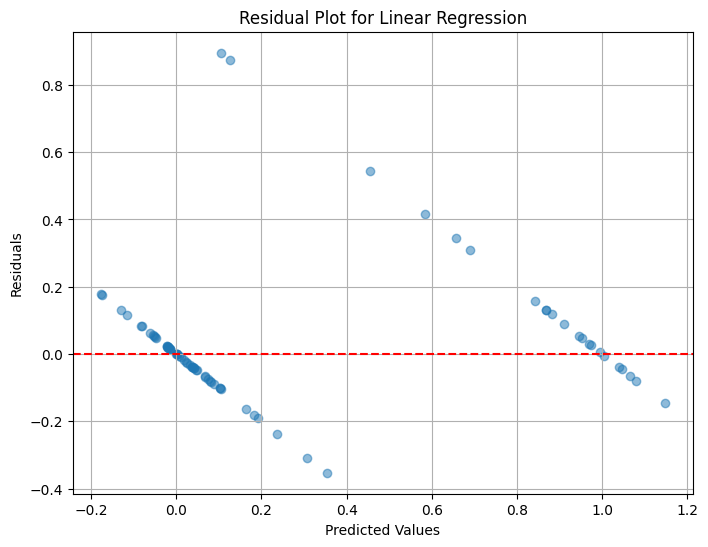

In [46]:
def plot_residuals(y_true, y_pred, model_name):
  y_true_values = y_true['Recurred'].values.flatten() if isinstance(y_true, pd.DataFrame) and 'Recurred' in y_true.columns else (y_true.values.flatten() if hasattr(y_true, 'values') else y_true)


  # Ensure y_pred is a 1D array.
  y_pred_values = y_pred.flatten() if hasattr(y_pred, 'flatten') else y_pred

  if y_true_values.shape != y_pred_values.shape:
      print(f"Warning: Shapes of y_true ({y_true_values.shape}) and y_pred ({y_pred_values.shape}) do not match. Cannot plot residuals.")
      return

  residuals = y_true_values - y_pred_values

  plt.figure(figsize=(8, 6))
  plt.scatter(y_pred_values, residuals, alpha=0.5) # Added alpha for better visualization with overlapping points
  plt.axhline(y=0, color='r', linestyle='--')
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title(f"Residual Plot for {model_name}")
  plt.grid(True) # Added grid for better readability
  plt.show()

# Make predictions with the linear model
linear_predictions = linear_model.predict(X_test)

# Assuming y_test is a DataFrame with a 'Recurred' column
plot_residuals(y_test, linear_predictions, "Linear Regression")

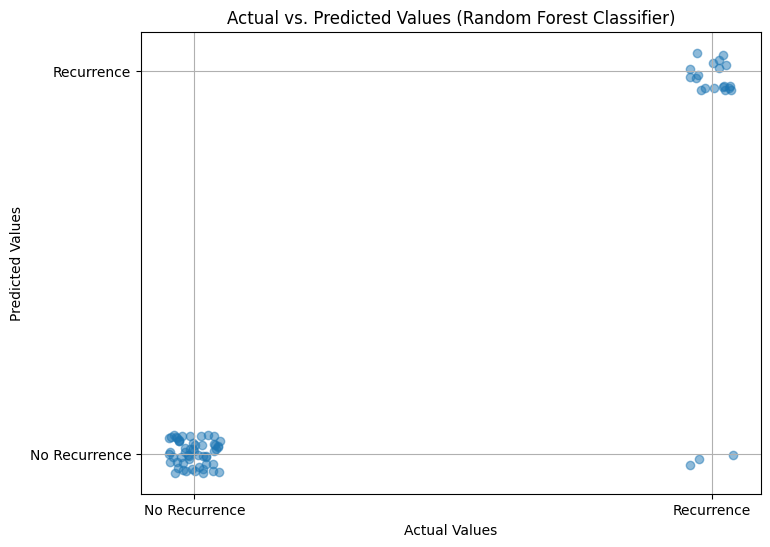

In [39]:
def plot_actual_vs_predicted_classification(y_true, y_pred, model_name):

  plt.figure(figsize=(8, 6))

  jitter_amount = 0.05
  y_true_jittered = y_true + np.random.uniform(-jitter_amount, jitter_amount, size=y_true.shape)
  y_pred_jittered = y_pred + np.random.uniform(-jitter_amount, jitter_amount, size=y_pred.shape)

  plt.scatter(y_true_jittered, y_pred_jittered, alpha=0.5)
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title(f"Actual vs. Predicted Values ({model_name})")

  plt.xticks([0, 1], ['No Recurrence', 'Recurrence'])
  plt.yticks([0, 1], ['No Recurrence', 'Recurrence'])
  plt.grid(True)
  plt.show()


y_test_values = y_test['Recurred'].values

# Corrected the variable name from rf_classifier_predictions to rf_predictions
plot_actual_vs_predicted_classification(y_test_values, rf_predictions, "Random Forest Classifier")

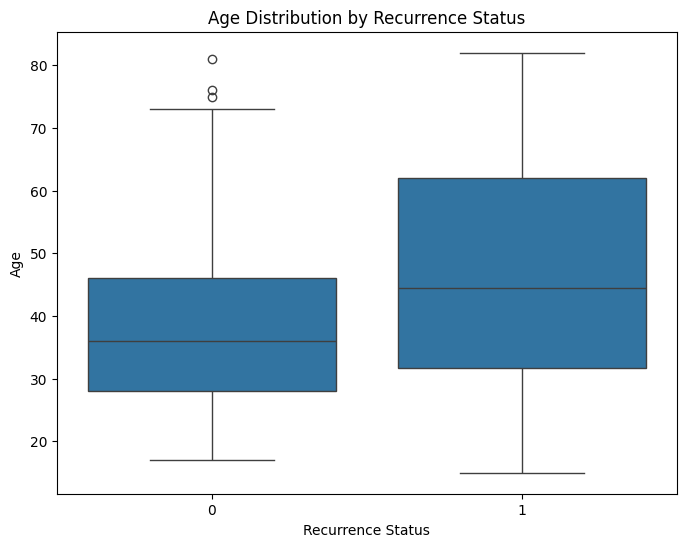

In [48]:
original_data = X.copy()
original_data['Recurred'] = y['Recurred']

# Handle missing values in 'Age' or 'Recurred' if necessary for plotting
original_data.dropna(subset=['Age', 'Recurred'], inplace=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Recurred', y='Age', data=original_data)
plt.xlabel('Recurrence Status')
plt.ylabel('Age')
plt.title('Age Distribution by Recurrence Status')
plt.show()

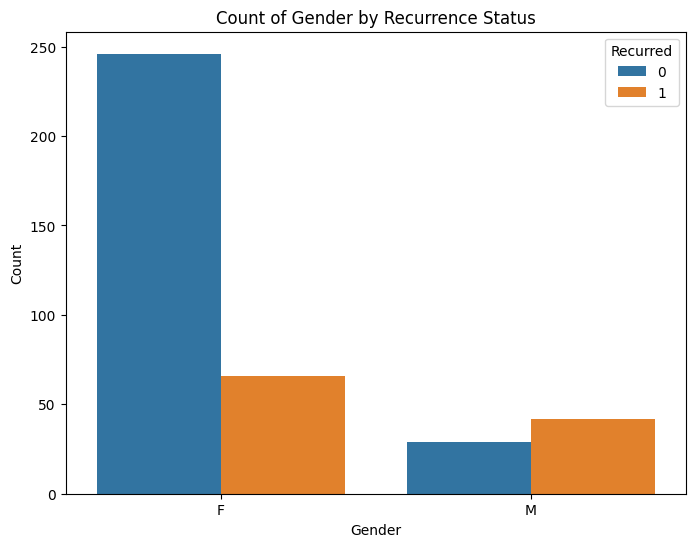

In [49]:
# Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Recurred', data=original_data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender by Recurrence Status')
plt.show()